<a href="https://colab.research.google.com/github/MayerT1/FSH_data/blob/master/FSH_mountingGD_Example_1_11_5_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps of Installation and Running Forest Stand Height (FSH) Python Scripts in your Google Drive permanently

## **(1) Mounting your Google Drive**
You have to run this script everytime to mount your Google Drive on your runtime using an authorization code

<img src="http://icons.iconarchive.com/icons/marcus-roberto/google-play/256/Google-Drive-icon.png">

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

## **(2) Install Required Python Libraries**
*   mpmath
*   simplekml



In [0]:
!pip install mpmath simplekml

## **(3) Install unzip tool**



In [0]:
!apt-get install unzip

## **(4) Create FSH folder in Google Drive on notebooks folder**


In [0]:
%cd /content/notebooks/
!mkdir FSH

## **(5) Download FSH Python scripts and Example data to your Google Drive**


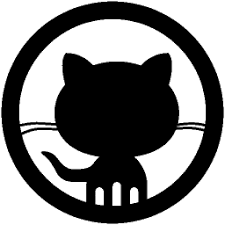

***Work on FSH folder***

In [0]:
%cd /content/notebooks/FSH

In [0]:
!git clone https://github.com/MayerT1/FSH_Python3.git
!git clone https://github.com/MayerT1/FSH_data.git

 ***Work on FSH_data folder***

In [0]:
%cd FSH_data/

***Remove all zip files*** 

In [0]:
!rm -f f890_o118.zip
!rm -f f890_o119.zip
!rm -f f890_o120.zip

***Download example data zip files using wget***

In [0]:
!wget https://github.com/MayerT1/FSH_data/raw/master/f890_o118.zip
!wget https://github.com/MayerT1/FSH_data/raw/master/f890_o119.zip
!wget https://github.com/MayerT1/FSH_data/raw/master/f890_o120.zip

***Unzip .zip files***

In [0]:
!unzip f890_o118.zip
!unzip f890_o119.zip
!unzip f890_o120.zip

## **(6) Run the Forest Stand Height**  

<img src="https://i.pinimg.com/originals/67/19/0b/67190b2076ccdf40951b613878e6bdf8.png">


*   auto_tree_height_many() - extracts data from ROI_PAC/ISCE output files and formats them for use in the rest of the scripts (15 secs)
*   intermediate() - calculates the overlap between each pair of images (12 mins 17 secs)
*   auto_mosaicking_new() - runs iterations of mosaicking (~34 secs per iteration, or 2 mins 49 secs total)
*   write_deltaSC() - calculates the temporal change parameters based on the final iteration (less than a second)
*   write_mapfile_new() - calculates and writes the tree height map to a file (7 mins 55 secs)
*   Use of --flag_diff calls write_diff_height_map() to produce the forest differential height map between the radar and overlapping lidar images (1 sec).
*   Use of --flag_error calls cal_error_metric() to produce the error metric file
*   List item that can be used for plotting figures (5 secs)

In [0]:
!python /content/notebooks/FSH/FSH_Python3/forest_stand_height.py 3 2 2 5 "linkfile.txt" "flagfile.txt" "Howland_LVIS_NaN.tif" "Maine_NLCD2011_nonwildland.tif" /content/notebooks/FSH/FSH_data/ "gif json kml mat tif" --flag_diff=1 --flag_error=1  --flag_proc=1

## **(7) Create the mosaic of the generated forest height maps for all of the scenes**

In [0]:
!python /content/notebooks/FSH/FSH_Python3/create_mosaic.py "/content/notebooks/FSH/FSH_data/" "3sc_mosaic.tif" "/content/notebooks/FSH/FSH_data/f890_o118/890_118_20070808_HV_20070923_HV_fsh.tif /content/notebooks/FSH/FSH_data/f890_o119/890_119_20070710_HV_20071010_HV_fsh.tif /content/notebooks/FSH/FSH_data/f890_o120/890_120_20070727_HV_20070911_HV_fsh.tif"

## **(8) Open the forest stand height output "/content/notebooks/FSH/FSH_data3sc_mosaic.tif"**
**in QGIS or others GIS software**
![](https://drive.google.com/uc?export=view&id=17b7-oSMPN8U353i0Gj4INP-3rGrs_jQN)

<img src="https://sa1-api.asm.skype.com/v1/objects/0-sa-d5-c8259b57346cde25735281e0418e25b0/views/imgpsh_fullsize_anim">
